In [1]:
"""Auction mutation analysis"""

from __future__ import annotations

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from core.core import decode_filename, save_plot, analysis_filename, ImageFormat

In [4]:
basic = [
    "mutate_iterative_auction_basic_j12_s2_0",
    "mutate_iterative_auction_basic_j15_s2_0",
    "mutate_iterative_auction_basic_j15_s3_0",
    "mutate_iterative_auction_basic_j25_s5_0"
]

paper = [
    "mutate_iterative_auction_fog_j15_s3_0",
    "mutate_iterative_auction_fog_j15_s3_1",
    "mutate_iterative_auction_fog_j25_s5_0",
    "mutate_iterative_auction_fog_j15_s3_1",
]

encoded_filenames = paper
folder = 'paper'
y_axis = 'Mutate Difference' 
title = 'Effect of job misrepresentation on prices'

In [15]:
data = []
model_names = []

for encoded_filename in encoded_filenames:
    filename, model_name, test_name = decode_filename(folder, encoded_filename)
    model_names.append(model_name)
    
    with open(filename) as file:
        file_data = json.load(file)

        for pos, result in enumerate(file_data):
            for mutation_name, mutation_results in result.items():
                if mutation_name == "no mutation":
                    data.append((pos, model_name, "No Mutation", mutation_results['total money'], 0, 0, 0, mutation_results['total_iterations']))
                else:
                    if mutation_results['mutant_value'] - mutation_results['mutated_value'] > 0:
                        print(mutation_results)
                    data.append((pos, model_name, "Mutation", mutation_results['total money'],
                                 mutation_results['mutant_value'], mutation_results['mutated_value'],                                     
                                 mutation_results['mutant_value'] - mutation_results['mutated_value'],
                                 mutation_results['total_iterations'], mutation_results['difference']))
data = reversed(data)

{'solve_time': 445.158, 'sum value': 552, 'percentage value': 0.932, 'percentage jobs': 0.8, 'server value': {'server 0': 220, 'server 1': 101, 'server 2': 231}, 'server storage usage': {'server 0': 0.979, 'server 1': 0.797, 'server 2': 0.972}, 'server computation usage': {'server 0': 1.0, 'server 1': 1.0, 'server 2': 1.0}, 'server bandwidth usage': {'server 0': 1.0, 'server 1': 1.0, 'server 2': 1.0}, 'num jobs': {'server 0': 5, 'server 1': 3, 'server 2': 4}, 'individual_compute_time': 5, 'total_iterations': 106, 'total_messages': 830, 'initial_cost': 0, 'total money': 242, 'prices': {'job 0': 12, 'job 1': 20, 'job 3': 18, 'job 4': 18, 'job 5': 10, 'job 6': 18, 'job 7': 16, 'job 9': 18, 'job 10': 20, 'job 11': 20, 'job 12': 20, 'job 13': 16, 'job 14': 18, 'job 2': 12, 'mutated job 8': 6}, 'revenues': {'server 0': 86, 'server 1': 58, 'server 2': 62}, 'price change': {'server 0': 2, 'server 1': 2, 'server 2': 2}, 'difference': 'job 8 - mutated job 8: 4, 6, 0, -58, 64', 'mutant_value': 6,

In [16]:
df = pd.DataFrame(data, columns=['Pos', 'Model', 'Mutation', 'Total Money', 'Mutant Value', 'Mutated Value',
                                 'Mutate Difference', 'Iterations', 'Difference'])
df

,Pos,Model,Mutation,Total Money,Mutant Value,Mutated Value,Mutate Difference,Iterations,Difference
0,3,Jobs: 15 Servers: 3,Mutation,510,2,30,-28,168,"job 4 - mutated job 4: 13, 4, 4, -20, 30"
1,3,Jobs: 15 Servers: 3,Mutation,478,2,42,-40,155,"job 5 - mutated job 5: 3, 15, 3, -50, 61"
2,3,Jobs: 15 Servers: 3,Mutation,514,0,32,-32,170,"job 13 - mutated job 13: 1, 13, 0, -21, 31"
3,3,Jobs: 15 Servers: 3,Mutation,474,2,42,-40,155,"job 8 - mutated job 8: 1, 12, 1, -29, 38"
4,3,Jobs: 15 Servers: 3,Mutation,492,0,36,-36,162,"job 10 - mutated job 10: 12, 6, 4, -26, 36"
...,...,...,...,...,...,...,...,...,...
231,0,Jobs: 15 Servers: 3,Mutation,564,4,40,-36,227,"job 5 - mutated job 5: 12, 1, 1, -41, 53"
232,0,Jobs: 15 Servers: 3,Mutation,570,2,40,-38,232,"job 1 - mutated job 1: 6, 12, 3, -44, 48"
233,0,Jobs: 15 Servers: 3,Mutation,488,6,40,-34,209,"job 9 - mutated job 9: 12, 19, 2, -78, 84"
234,0,Jobs: 15 Servers: 3,Mutation,534,6,42,-36,230,"job 14 - mutated job 14: 1, 9, 4, -52, 55"


In [17]:
df[df['Mutate Difference'] > 0]

,Pos,Model,Mutation,Total Money,Mutant Value,Mutated Value,Mutate Difference,Iterations,Difference
153,10,Jobs: 15 Servers: 3,Mutation,242,6,4,2,106,"job 8 - mutated job 8: 4, 6, 0, -58, 64"


Save file location: ../figures/auction_mutation/png/mutate_auction.png


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Save file location: ../figures/auction_mutation/eps/mutate_auction.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


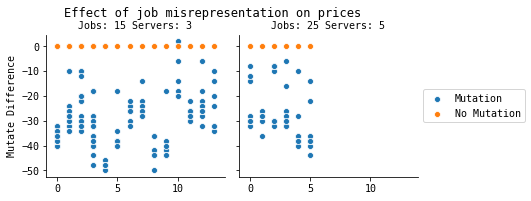

In [23]:
g = sns.FacetGrid(df, col='Model', col_wrap=2, hue='Mutation')
g = (g.map(sns.scatterplot, 'Pos', y_axis)
     .set_titles("{col_name}").set_xlabels(""))
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle(title)

save_plot(analysis_filename('mutate', 'auction'), "auction_mutation", image_formats=[ImageFormat.PNG, ImageFormat.EPS])

g